In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load data dari file Excel
file_name = 'deskriptor.xlsx'
data = pd.read_excel(file_name)

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['IE'])  # Ambil semua kolom kecuali 'IE' sebagai fitur
y = data['IE']  # Kolom 'IE' sebagai target

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalisasi dan standarisasi data
scaler_minmax = MinMaxScaler()  # Normalisasi
scaler_standard = StandardScaler()  # Standarisasi

# Fit-transform pada data training
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train_standardized = scaler_standard.fit_transform(X_train_normalized)

# Transform data testing
X_test_normalized = scaler_minmax.transform(X_test)
X_test_standardized = scaler_standard.transform(X_test_normalized)

# Tetapkan parameter ANN secara manual
optimizer = 'adam'  # Optimizer yang digunakan
neurons = 64  # Jumlah neuron di setiap lapisan
hidden_layers = 7  # Jumlah lapisan tersembunyi
batch_size = 64  # Ukuran batch
epochs = 1000  # Jumlah epoch

# Pembangunan model ANN
model = Sequential()

# Lapisan input pertama
model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

# Tambahkan lapisan tersembunyi
for _ in range(hidden_layers):
    model.add(Dense(neurons, activation='relu'))

# Lapisan output
model.add(Dense(1, activation='linear'))

# Kompilasi model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Latih model
model.fit(X_train_standardized, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

# Prediksi pada training dan test set
y_train_pred = model.predict(X_train_standardized).flatten()
y_test_pred = model.predict(X_test_standardized).flatten()

# Hitung metrik untuk training dan test set
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Tampilkan hasil
print("\nTraining Set:")
print(f"R-squared: {train_r2:.4f}")
print(f"Mean Squared Error: {train_mse:.4f}")

print("\nTest Set:")
print(f"R-squared: {test_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")

# Buat tabel label, prediksi, dan residu untuk test set
test_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Residual': y_test.values - y_test_pred
})

# Buat tabel label, prediksi, dan residu untuk training set
train_results = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted': y_train_pred,
    'Residual': y_train.values - y_train_pred
})

print("\nTest Set Results:")
print(test_results)

print("\nTraining Set Results:")
print(train_results)

# # Simpan hasil ke file Excel (opsional)
# test_results.to_excel('test_set_results_ann.xlsx', index=False)
# train_results.to_excel('train_set_results_ann.xlsx', index=False)


c:\Users\Pongo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Training Set:
R-squared: 0.9814
Mean Squared Error: 0.1910

Test Set:
R-squared: 0.6900
Mean Squared Error: 2.4574

Test Set Results:
   Actual  Predicted  Residual
0   94.49  93.237900  1.252100
1   94.37  94.276367  0.093633
2   97.20  94.440216  2.759784
3   89.40  90.197922 -0.797922

Training Set Results:
    Actual  Predicted  Residual
0    96.39  96.413658 -0.023658
1    93.12  92.934654  0.185346
2    93.00  93.302841 -0.302841
3    98.50  98.310120  0.189880
4    96.68  96.708664 -0.028664
5    91.91  92.195694 -0.285694
6    94.80  94.666656  0.133344
7    96.18  96.542671 -0.362671
8    93.17  93.149078  0.020922
9    90.72  90.567719  0.152281
10   89.37  89.451424 -0.081424
11   89.90  89.921509 -0.021509
12   87.36  87.526733 -0.166733
13   92.70  92.596092  0.103908
14   94.89  94.802521  0.087479
15   95.29  95.278290  0.011710
16   95.02  93.467346  1.552654
17   95.97  96.002853 -0.032853
18 

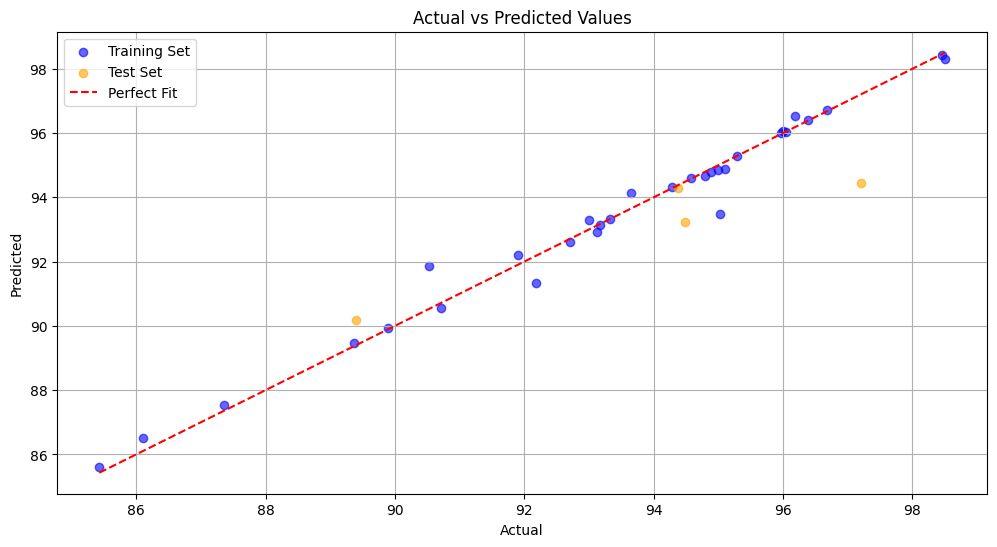

In [85]:
import matplotlib.pyplot as plt
# Plot Eksperimen vs Prediksi untuk training set
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Training Set')
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.6, label='Test Set')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

In [86]:
print(train_results)

    Actual  Predicted  Residual
0    96.39  96.413658 -0.023658
1    93.12  92.934654  0.185346
2    93.00  93.302841 -0.302841
3    98.50  98.310120  0.189880
4    96.68  96.708664 -0.028664
5    91.91  92.195694 -0.285694
6    94.80  94.666656  0.133344
7    96.18  96.542671 -0.362671
8    93.17  93.149078  0.020922
9    90.72  90.567719  0.152281
10   89.37  89.451424 -0.081424
11   89.90  89.921509 -0.021509
12   87.36  87.526733 -0.166733
13   92.70  92.596092  0.103908
14   94.89  94.802521  0.087479
15   95.29  95.278290  0.011710
16   95.02  93.467346  1.552654
17   95.97  96.002853 -0.032853
18   85.43  85.611389 -0.181389
19   93.65  94.143524 -0.493524
20   90.52  91.869736 -1.349736
21   95.00  94.840912  0.159088
22   92.18  91.345024  0.834976
23   96.00  96.049301 -0.049301
24   96.04  96.038689  0.001311
25   93.32  93.338310 -0.018310
26   86.10  86.500870 -0.400870
27   98.45  98.427750  0.022250
28   95.10  94.872063  0.227937
29   94.58  94.599915 -0.019915
30   94.

In [87]:
print(test_results)

   Actual  Predicted  Residual
0   94.49  93.237900  1.252100
1   94.37  94.276367  0.093633
2   97.20  94.440216  2.759784
3   89.40  90.197922 -0.797922


In [88]:
test_results.to_excel('test_set_results_ann.xlsx', index=False)
train_results.to_excel('train_set_results_ann.xlsx', index=False)